In [60]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aviakompaniya/sample_submission.csv
/kaggle/input/aviakompaniya/train_dataset.csv
/kaggle/input/aviakompaniya/test_dataset.csv


In [61]:
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [62]:
## Datasetni chaqirib olamiz

d = [pd.read_csv("/kaggle/input/aviakompaniya/" +x+ "_dataset.csv") for x in ['train','test']]


## Ustundagi nan qiymatlarni to'ldiramiz


mean = d[0]['Arrival Delay in Minutes'].sum()/len(d[0]['Arrival Delay in Minutes'])
d[0]['Arrival Delay in Minutes']=d[0]['Arrival Delay in Minutes'].fillna(mean)
mean = d[1]['Arrival Delay in Minutes'].sum()/len(d[1]['Arrival Delay in Minutes'])
d[1]['Arrival Delay in Minutes']=d[1]['Arrival Delay in Minutes'].fillna(mean)


## Id ustunini o'chitramiz


d[0].drop('id',axis=1,inplace=True)
d[1].drop('id',axis=1,inplace=True)


## To'liq pipeline yaratamiz


d_n = ['Age',
       'Flight Distance',
       'Inflight wifi service',
       'Departure/Arrival time convenient',
       'Ease of Online booking','Gate location',
       'Seat comfort','Inflight entertainment',
       'On-board service',
       'Leg room service',
      'Baggage handling',
      'Checkin service',
      'Inflight service',
      'Cleanliness',
      'Departure Delay in Minutes',
     'Arrival Delay in Minutes']
d_s = ['Gender',
       'Customer Type',
       'Type of Travel',
       'Class']


full_pyp = ColumnTransformer([
    ('num', StandardScaler(), d_n),
    ('st_r', OneHotEncoder(), d_s)
])



## x va y ga ajratib olamiz


y = d[0]['satisfaction'].copy()
x = d[0].drop('satisfaction',axis=1)

## x ni trainga tayorlaymiz

X = full_pyp.fit_transform(x)
x_te = full_pyp.fit_transform(d[1])


## Test va trainga ajratamiz

x_train,x_test,y_train,y_test = train_test_split(X, y,test_size=0.2,random_state=42)

## Modelni kuramiz aniqligi bilan 

Rand_model = RandomForestClassifier()
Rand_model.fit(x_train,y_train)

Tree_model = DecisionTreeClassifier()
Tree_model.fit(x_train,y_train)

xgb_model = XGBClassifier()
xgb_model.fit(x_train,y_train)

k_model = KNeighborsClassifier()
k_model.fit(x_train,y_train)

KNeighborsClassifier()

In [63]:
r_pred = Rand_model.predict(x_test)
d_pred = Tree_model.predict(x_test)
xgb_pred = xgb_model.predict(x_test)
knn_pred = k_model.predict(x_test)

In [64]:
print(f"RandomForestClassifier modeli aniqligi  {metrics.accuracy_score(y_test,r_pred)*100}%")
print(f"DecisionTreeClassifier modeli aniqligi  {metrics.accuracy_score(y_test,d_pred)*100}%")
print(f"XGBClassifier modeli aniqligi  {metrics.accuracy_score(y_test,xgb_pred)*100}%")
print(f"KNeighborsClassifier modeli aniqligi  {metrics.accuracy_score(y_test,knn_pred)*100}%")

RandomForestClassifier modeli aniqligi  94.95%
DecisionTreeClassifier modeli aniqligi  93.30000000000001%
XGBClassifier modeli aniqligi  95.15%
KNeighborsClassifier modeli aniqligi  90.35%


##RandomForestClassifier modeli 

In [77]:
r_test = Rand_model.predict(x_te)


In [78]:
df = pd.read_csv("/kaggle/input/aviakompaniya/sample_submission.csv")
df['satisfaction'] = r_test
df


,id,satisfaction
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
3995,3996,1
3996,3997,0
3997,3998,0
3998,3999,1


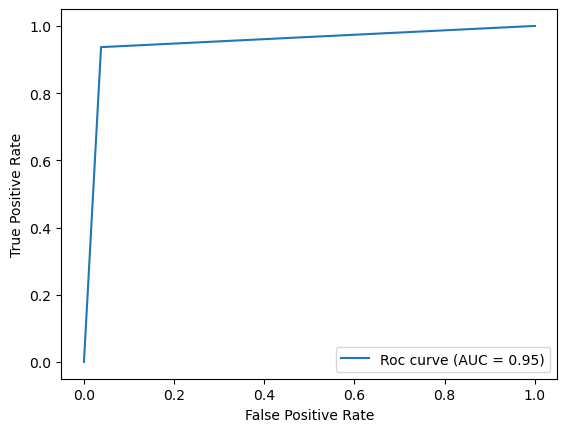

In [73]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,r_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Roc curve')
display.plot()
plt.show()